In [31]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

from pandas_datareader import data, wb
from statistics import mean

import datetime as dt

plt.rcParams['figure.figsize'] = (15, 5)

In [7]:
df=pd.read_csv(r'C:\Users\neilg\Downloads\us-education-datasets-unification-project\states_all.csv', encoding='latin1')

In [8]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


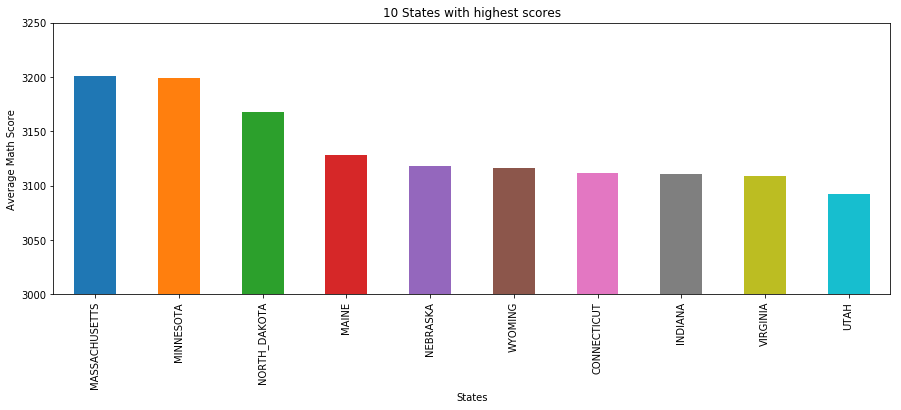

In [48]:
states = df.groupby('STATE').sum()

states = states.sort_values(by = 'AVG_MATH_8_SCORE',ascending = False)[0:10]

states['AVG_MATH_8_SCORE'].plot(kind='bar')

plt.xlabel('States')
plt.ylabel('Average Math Score')
plt.title('10 States with highest scores')

#plt.yticks([0, 1000, 1500, 2000, 2500, 3000, 3500]
#plt.yticks(np.arange(0, 3500, 1000))

axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([3000,3250])

# show the plot
plt.show()

(0, 10000000)

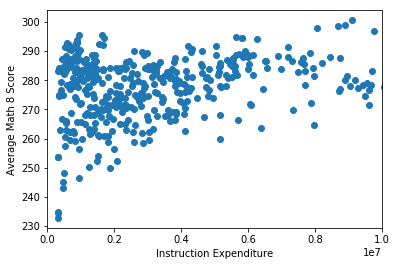

In [27]:
plt.scatter('INSTRUCTION_EXPENDITURE', 'AVG_MATH_8_SCORE', data=df)
plt.xlabel('Instruction Expenditure')
plt.ylabel('Average Math 8 Score')
axes_scatter = plt.gca()
axes_scatter.set_xlim([0,10000000])

In [32]:
xs = df.INSTRUCTION_EXPENDITURE
ys = df.AVG_MATH_8_SCORE

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

nan nan
